---

# 2値分類

線形回帰では，入力と出力の関係性を調べました．  
分類問題では，入力されたデータがどのカテゴリに所属するかを分類します．

今回使用する「アイリス・データセット」の場合
- 入力された画像（アヤメという名前の花）の品種

を分類します．  
<br>

特に，今回は2値分類問題なので
- 出力が「0」→ setosa（品種の種類1）
- 出力が「1」→ Versicolor（品種の種類2）

のように分類を行います．

---

## モデルの概要

モデルの概要は下図になります

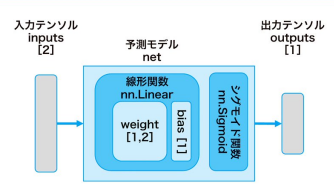

前章の線形回帰モデルと比較すると
- 後段にシグモイド関数が新たに加わっている

ことが分かります．  
  
これは，アルゴリズムの名称としては
- 「2値ロジスティック回帰モデル」

と呼ばれます．

---

## 精度（Accuracy）
線形回帰モデルでは，学習曲線によって損失がどの程度減少しているかを確認することでモデルの評価を行っていました．  
しかし，この損失がどの程度減っていれば「良いモデル」なのかといった明確な基準を決めるのは非常に難しいです．  

<br>

これに対して，本章で取り上げる2値分類は「正解値，予測値ともに1か0しかない」ため予測結果が正解かどうかを1件ごとに明確に判断可能です．

具体的には
- **（正解数）/（全体件数）**

によって，モデルがどの程度の比率で正しく予測できているかを数値化できます．  
この値は，機械学習では **「精度（accuracy）」** と呼ばれます．  

具体的な精度の算出方法のイメージは下図のとおりです．

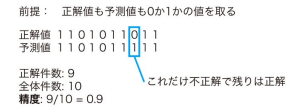

---

## 訓練データと検証データの分割
これまでの章では行ってきませんでしたが，学修データは「訓練データ」と「検証データ」の2種類に分ける必要があります．  
下図が学習データの分割のイメージ図です．  

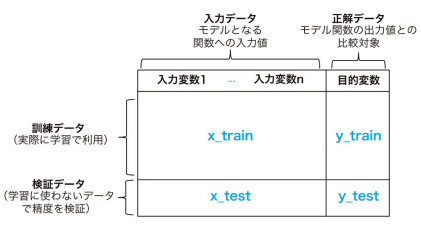

学習データを分ける比率にルールはありませんが，
- 訓練：検証 = 7:3または，6:4

にすることが多いです．

<br>  

検証データを用意する理由は，
- 学習したモデルが，学習データ以外に対しても精度が出るような汎用性を持っているか

を確認するためです．

逆に，学習データ以外に対して精度が出なくなってしまっている状態を **過学習** といいます．
この「過学習が起こっているかどうかを確認するのに必要になる」のが検証データになります．  

下図は典型的な過学習の例で，繰り返し回数が40回を超えたあたりで，検証データの精度が下がっていることがわかります．  
そのため，下図の場合は「40回以下程度の繰り返し回数で学習を終了することが適切である」と言えるでしょう．

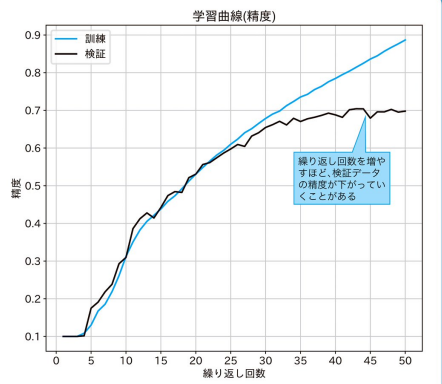


---

## シグモイド関数

分類問題では
- ネットワークからの出力をシグモイド関数に通したもの

が最終的な出力結果となります．  
ここで，以下のコードでシグモイド関数がどういったグラフになるのか確認してみましょう


In [ ]:
!pip install japanize_matplotlib | tail -n 1

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# NumPy配列でxデータを定義
x_np = np.arange(-4, 4.1, 0.25)

# データをTensor形式に変換
x = torch.tensor(x_np).float()

# yの値を計算
y = torch.sigmoid(x)

# グラフ描画
plt.title('シグモイド関数のグラフ')
plt.plot(x.data, y.data)
plt.show()

上記のグラフをみてもらうと，
- 出力が0〜1の間に収まっている

ことがわかります．  
これを数式で記述すると以下のとおりです（ここで，$x$ は入力です）．　　
$$ f(x)=\frac{1}{1+exp(-x)}$$

また，シグモイド関数の特性は以下のとおりです
- 常に値が増加し続ける（単純増加関数）
- 0から1の間の値をとる
- x=0のときの値は0.5
- グラフは点(0, 0.5)に関して点対称

<br>

このように，シグモイド関数はすごく大きい値，もしくはすごく小さい値であっても必ず0〜1の間に収めてくれるため
- シグモイド関数からの出力が0.5以上ならば「1」に分類
- シグモイド関数からの出力が0.5未満ならば「0」に分類

といったようにすることで「0」か「1」かの2値分類に利用することができます．

  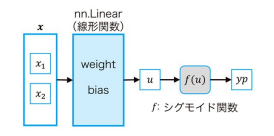


---

## 交差エントロピー誤差
分類モデルでは，損失関数に「交差エントロピー誤差」を使用します．  

<details>
<summary>交差エントロピー誤差の詳細</summary>

最初に，シグモイド関数の出力として得られる確率値は厳密に言うと「**入力データに対して分類結果が1になる確率** 」  

2値分類の場合，正解地は1か0なので「分類結果が1になる確率」が$f(u)$なら，「分類結果が0になる確率」は$1-f(u)$で表される  

5つのデータ系列に対して1次関数の結果がそれぞれ$u_1, u_2, u_3, u_4, u_5$で，正解値が$yt_1=1, yt_2=0, yt_3=0, yt_4=1, yt_5=0$の場合を例にすると，**「モデル確信度」（分類結果が正解の確率）**は，それぞれ  
$$f(u_1), 1-f(u_2), 1-f(u_3), f(u_4), 1-f(u_5)$$
となる  

ここで損失関数に最尤推定という考え方を導入する  
これは，「**すべてのデータに対する確信度を掛け合わせた結果を最大にするパラメータが一番もっともらしいので採用する**」という考え方  

つまり，上の5つのモデル確信度を例にすると，下記の関数を最大にするパラメータを探すこととなる  
$$f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5)$$  

上記の式は，積なので**対数を取ることで和の形に変更**する（和の形の方が計算速度が早い）  
$$\log(f(u_1) \cdot 1-f(u_2)\cdot 1-f(u_3)\cdot f(u_4)\cdot 1-f(u_5))\\
=\log(f(u_1) + 1-f(u_2)+ 1-f(u_3)+ f(u_4)+ 1-f(u_5))$$  

さらに，次の変形を行うと確信度の組み合わせが変わった場合でも，場合分けすることなく対数を表現可能  
$$yt_i \cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$
上記式に，$yt_i=1$，$yt_i=0$をそれぞれ代入すると確認できる  

すると，上式（対数尤度関数）は次のようになる  
$$\sum_{i=1}^{5} yt_i\cdot \log(f(u_i))+(1-yt_i)\cdot \log(1-f(u_i))$$  
この式の値は「**5件のデータの確信度の積が最も大きいとき（＝全てのデータの予測値と正解値が一致した時）最大になる**」  
**損失関数はできるだけ小さくすることが目標なので，この式にマイナスをかける**  
</details>

Pytorchでは，交差エントロピー関数は`torch.nn.BCELoss`という名前で実装されています．  


---

## データ準備
学習に必要なライブラリを読み込み，入力データと正解データを作成します．今回はscikit-learnライブラリに含まれている「アイリスデータセット」と呼ばれるデータセットを使用します．

In [ ]:
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

print("元データ", x_org.shape, y_org.shape)

# データ絞り込み
# アイリスデータセットは150行ある．今回は2値分類なので100行目までに含まれる「Setosa」と「versicolour」の正解データのみを抽出．
x_data = iris.data[:100,:2] # 列方向は最初の2列（spal（がく片）の長さと幅）のみを抽出
y_data = iris.target[:100]

print("対象データ", x_data.shape, y_data.shape)

元データ (150, 4) (150,)
対象データ (100, 2) (100,)


<br>

冒頭で述べた通り，訓練データと検証データへの分割を行います．  
今回は，scikit-learnの機能である`train_test_split`を使用してデータを分割します．  

- **順番を変えずに分割すると，データに偏りが出てしまい学習結果に影響が出てしまう可能性がある**

ので注意しましょう．今回の`train_test_split`の場合はシャッフルも同時に行ってくれるので気にしなくてもOKです．  

また，今回は`random_state`を固定の値に設定しています．この値を設定するとシャッフルする際の乱数値が固定になるので，分割結果を毎回同じにすることができます（このオプションについては，設定しなくても問題はありません．同じ結果を再現したい時などに利用するとよいでしょう）．

In [ ]:
# 元のデータサイズ
print(x_data.shape, y_data.shape)

# 訓練データ，検証データに分割（シャッフルも同時に実施）
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, train_size=70, test_size=30,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(100, 2) (100,)
(70, 2) (30, 2) (70,) (30,)


<br>

下記のコードで，データの散布図を表示してみると，直線を引くことで2つのグループに分割できそうなのがわかると思います．  

今回は，
- 2つのグループを最も上手く分割できる直線を学習する

ことが目的になります．

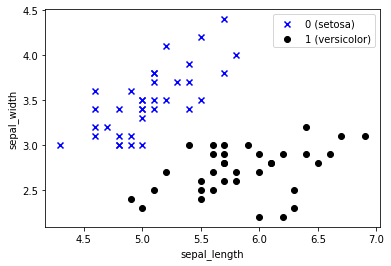

In [ ]:
# 散布図の表示

x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='b', label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='k', label='1 (versicolor)')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()


---

## モデル定義

学習モデルを定義します．大まかな構成は線形回帰の時と同じですが，以下の点が異なります．

- モデルのforward関数内で入力テンソル `x` を線形関数 `self.l1`にかけた後，**その結果に対して，さらにシグモイド関数 `self.sigmoid` をかけたものを出力**としています．


In [ ]:
# 入力次元数と出力次元数の定義 --------------------------
# 入力次元数（今回は2）
n_input = x_train.shape[1]

# 出力次元数
n_output = 1
print(f"n_input: {n_input} n_output:{n_output}")

# モデルの定義 ---------------------------------------
import torch
# モデルの定義
# 2入力，1出力のロジスティック回帰モデル

class Net(torch.nn.Module):
  def __init__(self, n_input, n_output):
    super().__init__()
    self.l1 = torch.nn.Linear(n_input, n_output)
    self.sigmoid = torch.nn.Sigmoid()

    # 初期値を全部1にする
    # 「ディープラーニングの数学」と条件を合わせる
    self.l1.weight.data.fill_(1.0)
    self.l1.bias.data.fill_(1.0)

  # 予測関数の定義
  def forward(self, x):
    # 最初に入力値を線形関数にかけた結果を計算
    x1 = self.l1(x)
    # 計算結果にシグモイド関数をかける
    x2 = self.sigmoid(x1)
    return x2

# インスタンスの生成 ---------------------------------------
net = Net(n_input, n_output)

# モデルの概要表示 ---------------------------------------
# 線形関数の後に，シグモイド関数が追加されている
print(net)

n_input: 2 n_output:1
Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


<br>

次に，最適化アルゴリズムと損失関数を定義します．  

今回は２値分類問題なので，
- 交差エントロピー関数を損失関数として定義

しています．

In [ ]:
import torch.optim as optim
# 損失関数：交差エントロピー関数
criterion = torch.nn.BCELoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

損失の計算グラフを`make_dot`関数により確認してみると，下図のようになります（コード略）．線形関数の後にシグモイド関数があることが分かると思います．

  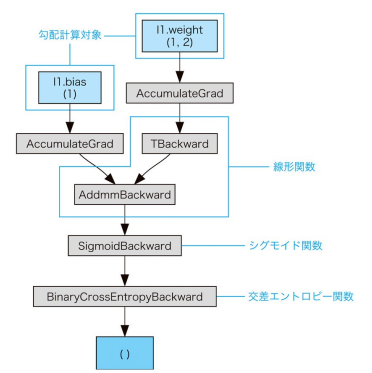


---

## 学習
最初に，学習を行うための準備をします．  

先ほど説明したように，今回は「訓練用データ」と「検証用データ」に分けるため
- 検証に使う`input_test`と`label_test`も精度評価用に準備します．

<br>  

また，損失関数`BCELoss`を使用する場合，正解データとしての第2引数は，第1引数とshapeが揃っている必要があります．

In [ ]:
# 入力データx_trainと正解データy_trainのテンソル化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).float()

# 正解データをN行1列に変換
labels1 = labels.view((-1, 1))

# 検証データのテンソル化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).float()

# 検証用の正解データもN行1列の行列に変換
labels1_test = labels_test.view((-1, 1))

<br>

次に，実際に学習を行います．  
大まかな流れは，線形回帰の時と同じですが，以下の箇所が異なります．
- 「訓練フェーズ」と「予測フェーズ」に分かれています（線形回帰の時は，「訓練フェーズ」だけでした）．
    - 予測フェーズの時は，学習はしないので「勾配計算」「パラメータ修正」のステップがなくなっています．
- 以下の箇所で，モデルからの出力が0.5より大きいかどうかで，予測値が1か0かを判定しています．  
    ```
    predicted = torch.where(outputs < 0.5, 0, 1)
    ```
- 以下の箇所で，精度（（正解件数）/（全体件数））を計算しています．  
    ```
    train_acc = (predicted == labels1).sum() / len(y_train)
    ```

In [ ]:
# 準備 -------------------------------
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数：交差エントロピー関数
criterion = torch.nn.BCELoss()

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 記録用リストの初期化
history = np.zeros((0,5))


# 繰り返し計算メインループ---------------------
for epoch in range(num_epochs):
    # 訓練フェーズ ----------------------------------------
    
    #勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels1)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 損失の保存(スカラー値の取得)
    train_loss = loss.item()

    # 予測ラベル(1 or 0)計算
    predicted = torch.where(outputs < 0.5, 0, 1)
    
    # 精度計算
    train_acc = (predicted == labels1).sum() / len(y_train)

    # 予測フェーズ ---------------------------------------------------

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels1_test)

    # 損失の保存（スカラー値の取得）
    val_loss =  loss_test.item()
        
    # 予測ラベル(1 or 0)計算
    predicted_test = torch.where(outputs_test < 0.5, 0, 1)

    # 精度計算
    val_acc = (predicted_test == labels1_test).sum() / len(y_test)
    
    if ( epoch % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

Epoch [0/10000], loss: 4.77289 acc: 0.50000 val_loss: 4.49384, val_acc: 0.50000
Epoch [10/10000], loss: 3.80546 acc: 0.50000 val_loss: 3.56537, val_acc: 0.50000
Epoch [20/10000], loss: 2.84329 acc: 0.50000 val_loss: 2.64328, val_acc: 0.50000
Epoch [30/10000], loss: 1.91613 acc: 0.50000 val_loss: 1.76244, val_acc: 0.50000
Epoch [40/10000], loss: 1.17137 acc: 0.50000 val_loss: 1.08537, val_acc: 0.50000
Epoch [50/10000], loss: 0.84140 acc: 0.50000 val_loss: 0.81872, val_acc: 0.50000
Epoch [60/10000], loss: 0.77087 acc: 0.50000 val_loss: 0.77093, val_acc: 0.50000
Epoch [70/10000], loss: 0.75450 acc: 0.34286 val_loss: 0.76105, val_acc: 0.33333
Epoch [80/10000], loss: 0.74542 acc: 0.25714 val_loss: 0.75447, val_acc: 0.20000
Epoch [90/10000], loss: 0.73734 acc: 0.24286 val_loss: 0.74778, val_acc: 0.16667
Epoch [100/10000], loss: 0.72949 acc: 0.24286 val_loss: 0.74098, val_acc: 0.13333
Epoch [110/10000], loss: 0.72180 acc: 0.27143 val_loss: 0.73419, val_acc: 0.16667
Epoch [120/10000], loss: 0.


---

## 結果確認
学習結果を確認します．

初期状態: 損失: 4.49384 精度: 0.50000
最終状態: 損失: 0.15395 精度: 0.96667


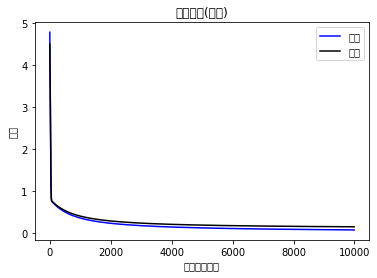

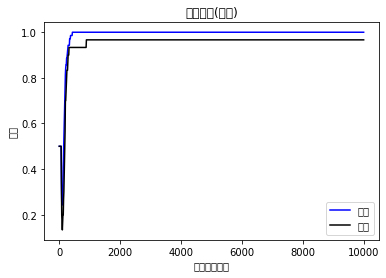

In [ ]:
# 損失と精度の確認
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

# 学習曲線の確認(損失)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

# 学習曲線の確認(精度)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

<br>

上記の結果を見ると，学習できているような気がします．  
次に，本当に上手く2つのクラスを分けるような直線を引くことができるのかを確認してみます．  
- 2つのクラスを分けるような直線を「決定境界」と呼びます．

BIAS = [0.33861226], WEIGHT = [[ 2.9700334 -5.300017 ]]
xl = [4.4 7. ]  yl = [2.52956916 3.98656204]


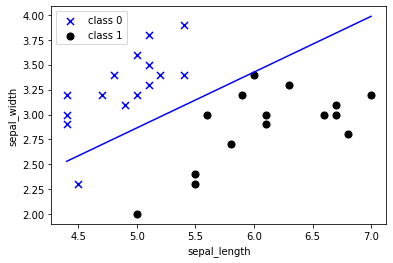

In [ ]:
# 検証データを散布図用に準備
x_t0 = x_test[y_test==0]
x_t1 = x_test[y_test==1]

# パラメータの取得
bias = net.l1.bias.data.numpy()
weight = net.l1.weight.data.numpy()
print(f'BIAS = {bias}, WEIGHT = {weight}')

# 決定境界描画用 x1の値から x2の値を計算する
def decision(x):
    return(-(bias + weight[0,0] * x)/ weight[0,1])

# 散布図のx1の最小値と最大値
xl = np.array([x_test[:,0].min(), x_test[:,0].max()])
yl = decision(xl)

# 結果確認
print(f'xl = {xl}  yl = {yl}')

# 散布図表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', 
        c='b', s=50, label='class 0')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', 
        c='k', s=50, label='class 1')

# 決定境界直線
plt.plot(xl, yl, c='b')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()
plt.show()



コードを実行した結果を見ると，決定境界が正しく生成できていることが確認できます．  
ちなみに，1つだけクラス0のサンプルがクラス1に分類されてしまっている（グラフ左下あたり）と思います．

左下のサンプルも含まれるように直線を引けば「今回入力したサンプルの場合」は完全な分類ができるのでそのほうが良いような気がします．しかし，ここに他の「未知のサンプル」が入ってきた場合は逆に全体としての分類精度が低下するかもしれません．  
このように，機械学習では
- （未知のサンプルも含めて）できるだけ多くのサンプルに対して正しく分類できる

ように学習します．逆に言えば，左下のサンプルのような，外れ値のサンプルに対しては正しい結果を求められないことも多々あります．


---

# 多値分類
前章の2値分類の問題を拡張して，多値分類の問題を扱います．   
2値分類との大きな違いは「出力数」になります．
- 多値分類では，分類先グループをNとした時に，N次元出力になります．
- また，これにより2値分類で使用していたシグモイド関数がsoftmax関数という別の関数へ変わります．
- 損失関数は，同じ交差エントロピー関数を使用しますが，形式が少し変わります．

---

## モデルの概要
今回のモデル図を以下に示します．  
モデル図を見ると活性化関数がないことが分かると思います．これは，多値分類の場合においてPytorch特有の独特な予測関数の定義方法があるためです．  
これについては，後程詳しく説明します．

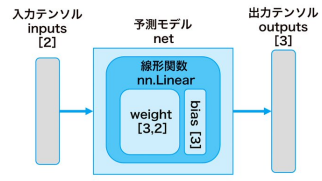



---

## 複数の分類器
多値分類器では
- N個の出力をN個の分類器と考えて
- それぞれの分類器の出力がそのグループである確率を求める

ことになります．そして
- 一番確率値の大きい分類器に該当するグループがモデルとしての予測値

となります．  
これを図で説明すると以下のようになります．

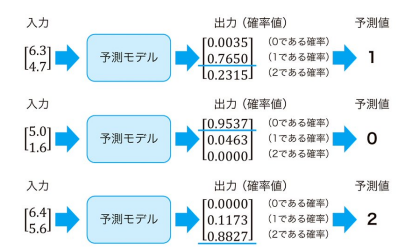


---

## 重み行列
多値分類では，出力数が1からNへと増加したので，1次関数もN個必要になります．  
これは
- 重みベクトルであったモデル内の変数が「重み行列」に変わる

ということです．イメージを下図に示します．
 
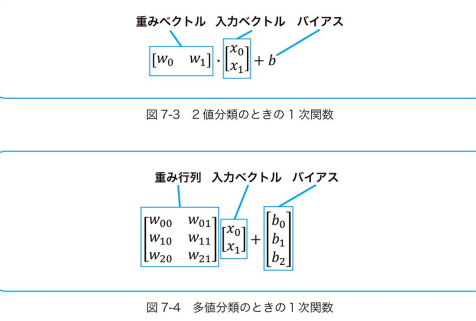




---

## ソフトマックス関数
多値分類ではsoftmax関数が活性化関数として使用されます．  
$$
y_i = \frac{\exp(x_i)}{\sum_{k=1}^{n}\exp(x_k)}
$$

softmax関数は
- 全ての出力を足すと1になり，これらの中で最も大きい出力を採用

します．計算例を下図に示します．

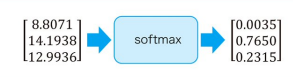



---

## 交差エントロピー関数
多値分類では2値分類と同様に交差エントロピー関数が使用されます．  
名前は同じですが，式は下記のように少し異なります
$$
\sum_{i=0}^{N-1}(yt_i\log(yp_i))
$$  

ここで，$yt_i$は正解の時に1，正解でないときに0の値を取ります．  

イメージ図は以下となります．

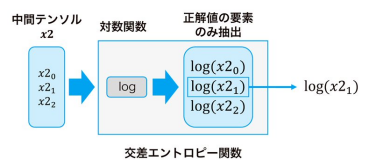  


具体的に説明すると
- まず．softmax関数からの出力すべてのlogを取ります．  
- そして「**正解値と対応する要素のみ**を抽出」します．

## 多値分類モデルにおける予測関数と損失関数の関係
ここでは「多値分類モデルにおける予測関数と損失関数の関係」について説明しますが，これはPytorch特有の問題となるため，理解が浅いうちは補足的なイメージで見てもらっても良いと思います．

最初に，多値分類における「損失」がPytorchでどのように実装されているかを下図に示します．  

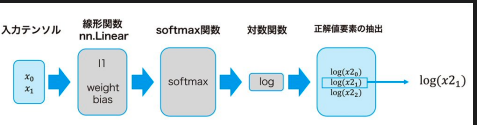

<br>

ここで，図を見ると「交差エントロピー関数」に対応する損失関数がPytorchでは実装されていないことがわかります．

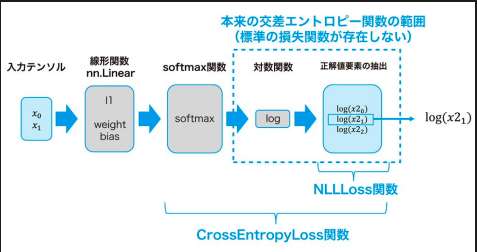

このような実装になっている理由としては
- 対数関数を独立して使うと不安定になるので必ず指数関数(シグモイド関数やsoftmax関数)とセットで使うべき

といったPytorch特有のポリシーがあるためです．

<br>

そのため，Pytorchで多値分類を実装する方法は下記の2種類のみになります（自作の関数を用いる場合を除く）．

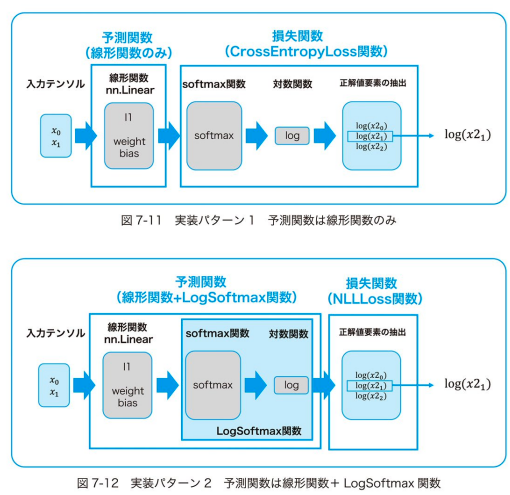

PyTorchでは実装パターン1が採用されることが多いです．

パターン1の実装の原則は以下になります．  
- 予測関数側では，活性化関数は不要で，**線形関数の出力をそのまま出力とする**
- 予測関数出力から**確率値を得たい場合は，予測関数出力にsoftmax関数をかける**
- **損失関数はCrossEntropyLoss関数**
- CrossEntropyLoss関数はその最終段がnn.NLLLoss関数なので．**第2引数として引き渡す正解値はNLLLoss関数同様に整数値にする必要**がある


---

## データの準備
学習データの準備を行います．  
「出力が3種類」である以外は，2値分類の時と同じです．


In [ ]:
# 学習用データ準備 ------------------
# ライブラリのインポート
from sklearn.datasets import load_iris

# データ読み込み
iris = load_iris()

# 入力データと正解データ取得
x_org, y_org = iris.data, iris.target

# 結果確認
print('元データ', x_org.shape, y_org.shape)

# データ絞り込み -----------------------
# 入力データはsepal（がく片）length(0)とpetal（花弁）length(2)のみ抽出
x_select = x_org[:,[0,2]]

print("元データ", x_select.shape, y_org.shape)


# 訓練データと検証データの比較 --------------
# 今回は，分割の比率を75件対75件にしている．また，パラメータは比率でも表せるため，0.5対0.5で指定しても同じ
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_select, y_org, train_size=75, test_size=75,
    random_state=123)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

元データ (150, 4) (150,)
元データ (150, 2) (150,)
(75, 2) (75, 2) (75,) (75,)


<br>

データの散布図を確認します．

In [ ]:
!pip install japanize_matplotlib | tail -n 1

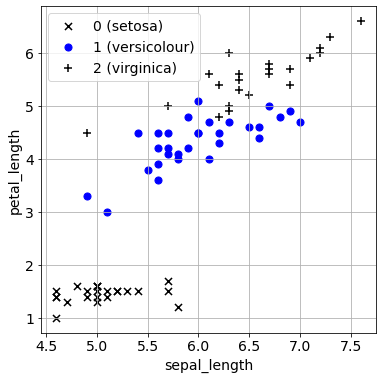

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14
# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)
# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True
# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=4)

# データを正解値ごとに分割
x_t0 = x_train[y_train == 0]
x_t1 = x_train[y_train == 1]
x_t2 = x_train[y_train == 2]

# 散布図の表示
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='k', s=50, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='o', c='b', s=50, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='k', s=50, label='2 (virginica)')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()
plt.show()


---

## モデル定義
モデルの定義を行います．   
先程説明した通り，
- 損失関数側で活性化関数をカバーしているため，forwar関数で活性化関数の部分がなくなっており，単純に線形関数の結果を返している

ことが分かります．

In [ ]:
# 学習用パラメータ設定 --------------------
# 入力次元数
n_input = x_train.shape[1]

# 出力次元数
# 分類先クラス数　今回は3
n_output = len(list(set(y_train)))

print(f"n_input: {n_input} n_output: {n_output}")

import torch

# モデルの定義 ---------------------------------
# 2入力3出力のロジスティック回帰モデル
class Net(torch.nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        self.l1 = torch.nn.Linear(n_input, n_output)
                
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的        
        self.l1.weight.data.fill_(1.0)
        self.l1.bias.data.fill_(1.0)

    def forward(self, x):
        x1 = self.l1(x)
        return x1
    
# インスタンスの生成 -----------------------
net = Net(n_input, n_output)  

n_input: 2 n_output: 3


<br>

次に最適化アルゴリズムと損失関数を定義します．  
2値分類の時との変更点は以下の通りです．
- 損失関数に`torch.nn.CrossEntropyLoss`クラスを利用しています．
    - この関数では **「softmax関数」「対数関数」「正解地要素の抽出」** の3つをまとめて行なっていることに注意してください． 

In [ ]:
import torch.optim as optim

# 損失関数：交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 学習率
lr = 0.01

# 最適化関数：勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)


---

## 学習

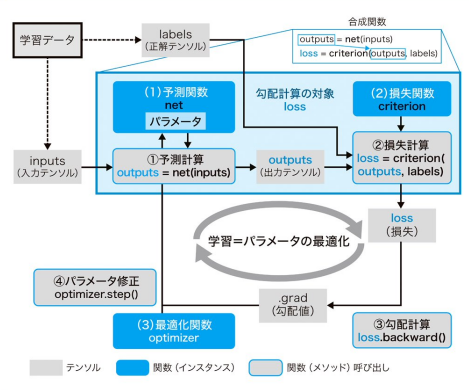

最初に，学習に必要な準備を行います．  
2値分類の時の変更点としては以下の通りです．
- `y_train`と`y_test`にfloat関数の代わりにlong関数を呼び出しています．
    - これは，学習で `loss = criterion(outputs, labels)`のように損失関数の第2引数として指定する際に，整数である必要があるためです．

In [ ]:
# 入力データx_trainと正解データy_trainのテンソル変数化

inputs = torch.tensor(x_train).float()
labels = torch.tensor(y_train).long()

# 検証データのテンソル変数化
inputs_test = torch.tensor(x_test).float()
labels_test = torch.tensor(y_test).long()

<br>

次に予測値ラベルの取得方法について説明します．  
本来は
- softmax関数の出力値のうち，一番大きい（1に一番近い）値を出力した分類器を予測値とする

のが正しいラベルの計算方法になります．

<br>

しかし，以下コードでは
- softmax関数にかける前の`outputs`に対して，一番大きい値を求めています．

これは，softmax関数が「入力の段階で最大であった項目が出力後も最大になる性質を持っている」という理由からです．



In [ ]:
# torch.max関数を呼び出し
# 2つ目の引数は軸を意味する．1だと行ごとの集計
print(torch.max(outputs, 1))

torch.return_types.max(
values=tensor([0.0159, 0.9475, 0.0037, 0.9764, 0.6170, 0.9990, 0.7970, 0.9672, 0.9985,
        0.2133, 0.1620, 0.9684, 0.0149, 0.8135, 0.2673, 0.9816, 0.0315, 0.9703,
        0.0257, 0.9919, 0.0135, 0.0557, 0.9158, 0.2133, 0.0177, 0.9034, 0.1376,
        0.0094, 0.9970, 0.0335, 0.0023, 0.9347, 0.0535, 0.0579, 0.0062, 0.0379,
        0.9898, 0.9738, 0.8321, 0.0810, 0.0335, 0.1768, 0.0591, 0.9879, 0.0557,
        0.0285, 0.8767, 0.9525, 0.9189, 0.0735, 0.0652, 0.9628, 0.9189, 0.0910,
        0.9992, 0.9812, 0.1328, 0.9421, 0.8696, 0.3293, 0.0094, 0.0026, 0.9738,
        0.0493, 0.9783, 0.8977, 0.9791, 0.0446, 0.9778, 0.7447],
       grad_fn=<MaxBackward0>),
indices=tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


<br>

上記のコードの`torch.max`では，最大値そのもの（values）と最大値をとったインデックス（indices）の2つを同時に返すようになっています．  
今回の場合，ラベルの値のみを取得したいので，下記コードのように2つ目のindiciesのみをとって来ればよいことになります．

In [ ]:
# 予測データのリストを取得
torch.max(outputs, 1)[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<br>

それでは，以上の追加点を考慮して作成した繰り返し処理(学習)が以下コードになります．

In [ ]:
# 準備 -----------------------------
# 学習率
lr = 0.01

# 初期化
net = Net(n_input, n_output)

# 損失関数： 交差エントロピー関数
criterion = torch.nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 10000

# 評価結果記録用
history = np.zeros((0,5))

# 繰り返し処理 -----------------------
for epoch in range(num_epochs):

    # 訓練フェーズ
    
    #勾配の初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)

    # 損失計算
    loss = criterion(outputs, labels)

    # 勾配計算
    loss.backward()
    
    # パラメータ修正
    optimizer.step()

    # 予測ラベル算出
    predicted = torch.max(outputs, 1)[1]

    # 損失と精度の計算
    train_loss = loss.item()
    train_acc = (predicted == labels).sum()  / len(labels)

    #予測フェーズ

    # 予測計算
    outputs_test = net(inputs_test)

    # 損失計算
    loss_test = criterion(outputs_test, labels_test)

    # 予測ラベル算出
    predicted_test = torch.max(outputs_test, 1)[1]

    # 損失と精度の計算
    val_loss =  loss_test.item()
    val_acc =  (predicted_test == labels_test).sum() / len(labels_test)
    
    if ((epoch) % 10 == 0):
        print (f'Epoch [{epoch}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([epoch, train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))


Epoch [0/10000], loss: 1.09861 acc: 0.30667 val_loss: 1.09263, val_acc: 0.26667
Epoch [10/10000], loss: 1.03580 acc: 0.40000 val_loss: 1.06403, val_acc: 0.26667
Epoch [20/10000], loss: 1.00477 acc: 0.40000 val_loss: 1.03347, val_acc: 0.26667
Epoch [30/10000], loss: 0.97672 acc: 0.40000 val_loss: 1.00264, val_acc: 0.26667
Epoch [40/10000], loss: 0.95057 acc: 0.41333 val_loss: 0.97351, val_acc: 0.26667
Epoch [50/10000], loss: 0.92616 acc: 0.48000 val_loss: 0.94631, val_acc: 0.38667
Epoch [60/10000], loss: 0.90338 acc: 0.69333 val_loss: 0.92098, val_acc: 0.56000
Epoch [70/10000], loss: 0.88212 acc: 0.70667 val_loss: 0.89740, val_acc: 0.60000
Epoch [80/10000], loss: 0.86227 acc: 0.70667 val_loss: 0.87545, val_acc: 0.61333
Epoch [90/10000], loss: 0.84373 acc: 0.70667 val_loss: 0.85500, val_acc: 0.62667
Epoch [100/10000], loss: 0.82640 acc: 0.70667 val_loss: 0.83594, val_acc: 0.62667
Epoch [110/10000], loss: 0.81019 acc: 0.72000 val_loss: 0.81815, val_acc: 0.62667
Epoch [120/10000], loss: 0.


---

### 結果の確認
学習結果の確認を行います．  
精度の学習曲線を見てみると，訓練データよりも検証データの方が良くなっていることが分かりますが，データの分割方法によってはこのような結果になることもあります．  
例えば，「データ件数が少ない」「外れ値がどちらに入っているか」といった理由で精度が大きく変わることがあります．

初期状態: 損失: 1.09263 精度: 0.26667
最終状態: 損失: 0.19795 精度: 0.96000


/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23398 (\N{CJK UNIFIED IDEOGRAPH-5B66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

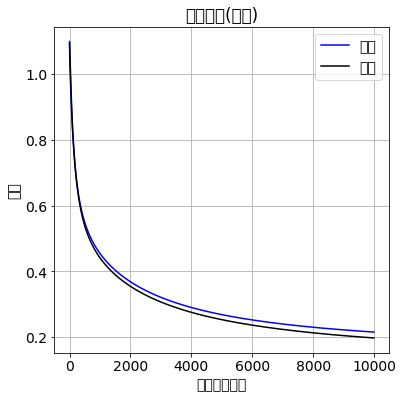

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


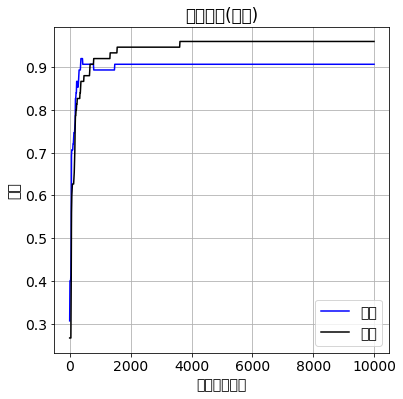

In [ ]:
# 損失と精度の確認 --------------
print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

# 学習曲線の表示 (損失) --------------
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

# 学習曲線の表示 (精度) -------------------
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()



<br>

次に，モデルの出力の確認を行いたいですが，今回はsoftmax関数が損失関数側に含まれてしまっているため，
- モデルの出力がどんな数値になっているか
- そこから確率値を取得したい場合どうしたらいいか

について説明したいと思います．

<br>

まず正解データの先頭の方から，値が0,1,2のものを1つずつ抜き出します．

In [ ]:
print(labels[[0,2,3]])

tensor([1, 0, 2])


<br>

次に，同様のインデックスで`inputs`のデータを検出します．

In [ ]:
i3 = inputs[[0,2,3],:]
print(i3.data.numpy())

[[6.3 4.7]
 [5.  1.6]
 [6.4 5.6]]


<br>

最後に，
- 絞り込んだi3を引数にnet関数を呼び出し，
- その結果をo3に格納し，
- また，o3をsoftmax関数にかけた結果をk3に格納します．

上記の手順によりnet関数の出力の確率値を取得できます．

In [ ]:
softmax = torch.nn.Softmax(dim=1)
o3 = net(i3)
k3 = softmax(o3)
print("学習後のモデルからの出力", o3.data.numpy())
print("モデルの出力にsoftmax関数をかけた結果", k3.data.numpy())

学習後のモデルからの出力 [[ 8.8071 14.1938 12.9986]
 [12.8262  9.8     0.1734]
 [ 6.7954 15.0928 17.1111]]
モデルの出力にsoftmax関数をかけた結果 [[0.0035 0.765  0.2315]
 [0.9537 0.0463 0.    ]
 [0.     0.1173 0.8827]]
